In [1]:
%reset
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from functions import loader, splt, fitter, stats
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from uncertainties import *
from uncertainties import unumpy as unp

savedir = "D04/"

In [4]:
all_data = loader.load_data( "../CloudVenetoAnalysisBis/20220611UngaussianityBySizescan_20220611/**/" )
data = all_data
len( data )

9

d:\Dropbox\Gali\Tesi\RSA_problem\Analysis\functions\fitter.py:102: RuntimeWarning: overflow encountered in exp
  return np.log( alpha ) - z - np.exp( - z )
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
d:\Dropbox\Gali\Tesi\RSA_problem\Analysis\functions\fitter.py:108: RuntimeWarning: overflow encountered in exp
  return np.log( pref ) - a * ( b * ( x - u ) + np.exp( - b * ( x - u ) ) )


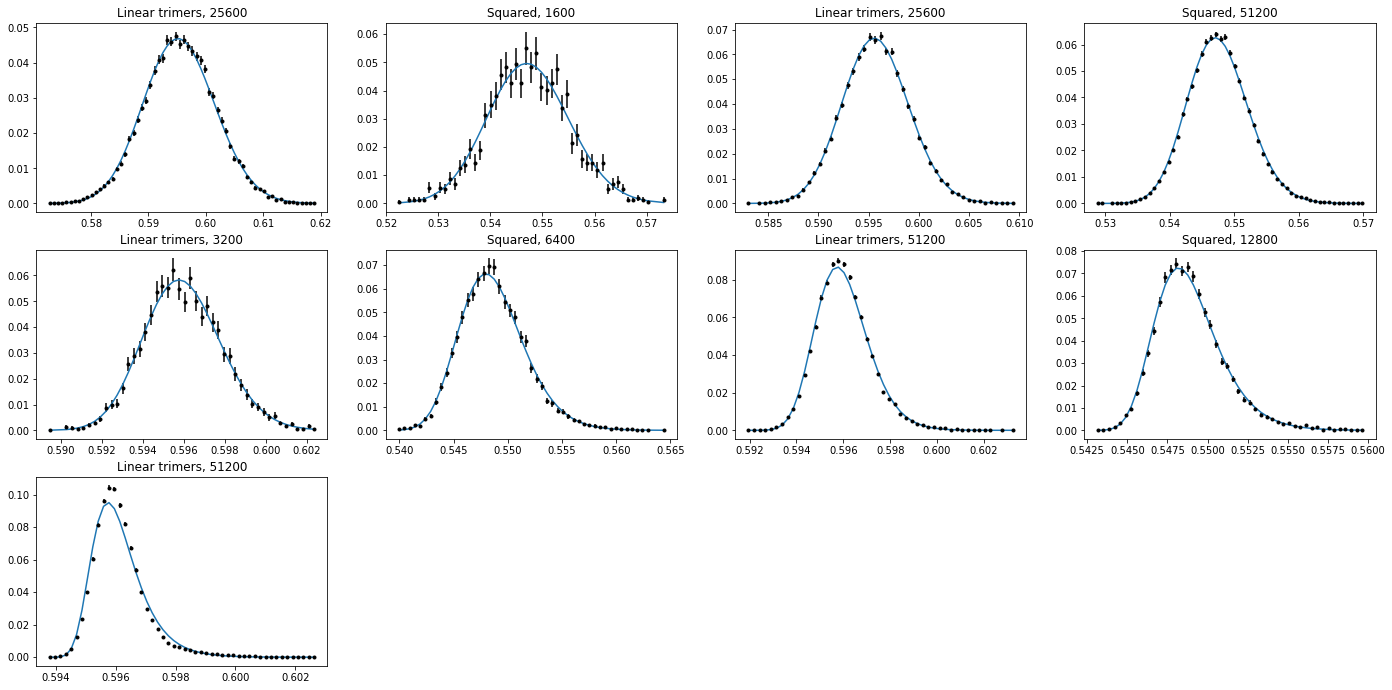

In [46]:
splt.init( 4, 4 )

for d in data:
    splt.next()

    rr = d['runned_replicas']
    x, y = fitter.rebin_n( d['h_x'], d['h'], 50 )
    d['fits'] = fitter.entropyc_fits( d['xs'], x )
    d['fits_x'] = x
    
    plt.plot( x, d['fits']['GG']['est_y'], label="GG" )
    plt.errorbar( x, y, np.sqrt( np.array ( y ) / rr ), color='k', marker='.', ls='' )

    plt.title( d['dep_polymers'] + f", {rr}" )

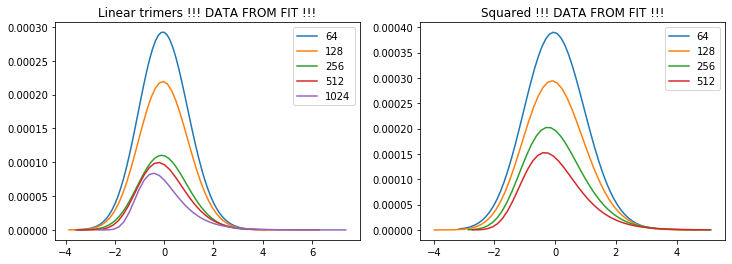

In [32]:
polys = np.unique( [ d['dep_polymers'] for d in data ] )

splt.init( 1, len( polys ) )

for p in polys:
    splt.next()

    for d in data:
        if( d['dep_polymers'] != p ):
            continue

        x = d['fits_x']
        y = d['fits']['GG']['est_y']

        # Normalize: zero mean, unitary std
        mu = d['fits']['GG']['pars'][0]
        std = d['fits']['GG']['pars'][1]
        x = ( x - mu ) / std
        y = y * std

        plt.plot( x, y, label=d['side'] )
        plt.legend()

    plt.title( p + " !!! DATA FROM FIT !!!")

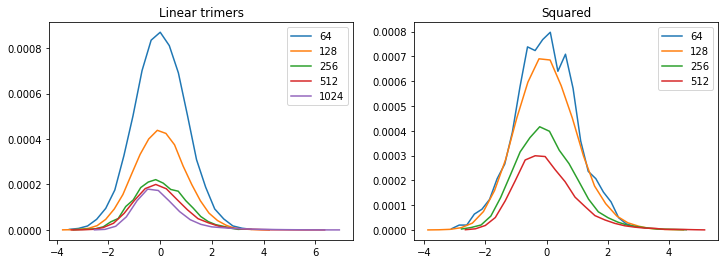

In [31]:
polys = np.unique( [ d['dep_polymers'] for d in data ] )

splt.init( 1, len( polys ) )

for p in polys:
    splt.next()

    for d in data:
        if( d['dep_polymers'] != p ):
            continue

        # d['fits'] = fitter.entropyc_fits( d['xs'], x )
        # d['fits_x'] = x
        
        # plt.plot( x, d['fits']['GG']['est_y'], label="GG" )
        # plt.errorbar( x, y, np.sqrt( np.array ( y ) / rr ), color='k', marker='.', ls='' )

        rr = d['runned_replicas']
        x, y = fitter.rebin_n( d['h_x'], d['h'], 25 )

        # Normalize: zero mean, unitary std
        mu = d['fits']['GG']['pars'][0]
        std = d['fits']['GG']['pars'][1]
        x = ( np.array( x ) - mu ) / std
        y = np.array( y ) * std

        plt.plot( x, y, label=d['side'] )
        plt.legend()

    plt.title( p )

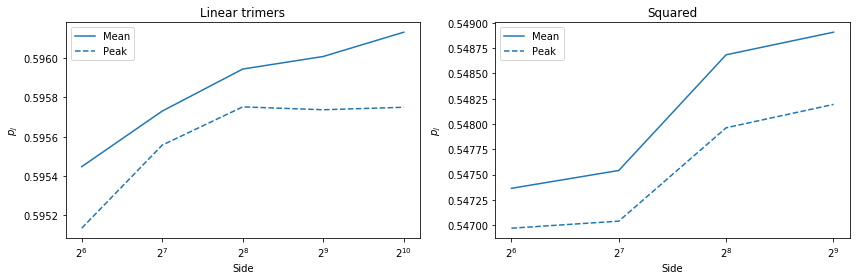

In [42]:
def get_GG_peak( d ):
    mu = data[d]['fits']['GG']['pars'][0]
    s  = data[d]['fits']['GG']['pars'][1]
    xs = np.linspace( mu - 3 * s, mu + 3 * s, 10000 )
    ys = fitter.GG( xs, 1, *data[d]['fits']['GG']['pars'] )
    return xs[ np.argmax( ys ) ]

splt.oneitem_iterate(
    len( data ),
    lambda d: data[d]['dep_polymers'],
    lambda d: 1,
    lambda d: data[d]['side'],
    lambda d: [
        data[d]['fits']['GG']['pars'][0],
        get_GG_peak( d )
    ],
    lambda it, l: [
        { 'label': fr"Mean", 'ls': '-', 'marker': ''  },
        { 'label': fr"Peak", 'ls': '--', 'marker': ''  }
    ],
    lambda it: (
        plt.title( f"{it}" ),
        plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"Side" ),
        plt.ylabel( "$p_j$" )
    )
)

plt.tight_layout()
plt.savefig( savedir + "nonparametric_skewness_byshape.pdf" )

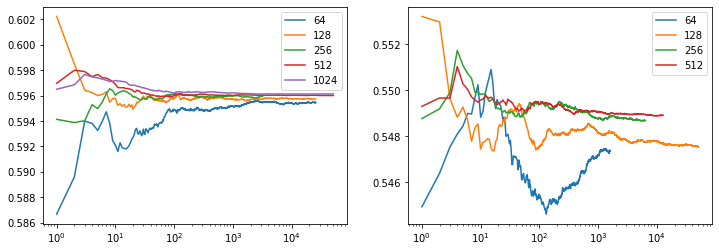

In [44]:
splt.init( 1, 2 )

for p in polys:
    splt.next()

    for d in data:
        if( d['dep_polymers'] != p ):
            continue
        
        x = np.arange( 1, d['runned_replicas'] )
        y = [ np.mean( d['xs'][:i] ) for i in x ]

        plt.semilogx( x, y, label = d['side'] )

    plt.legend()